# Modelação de sistemas térmicos usando modelos de primeira ordem

In [181]:
# bibliotecas
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt

# Obtenção das Respostas ao Degrau dos Sistemas Térmicos

 **Alínea a)**

Curva de resposta da temperatura do sistema térmico S1 para uma entrada em degrau de amplitude de 50% do duty cycle.

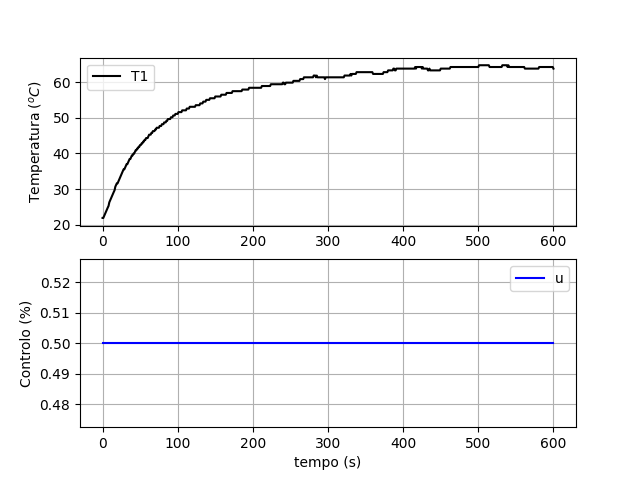

In [182]:
from IPython.display import Image
Image(filename='degrau_S1.png') 

        Os valores obtidos neste sistema têm em conta as propriedades do transistor e resistencia de potência, o tempo de execução do código (10 minutos) e a temperatura inicial. O sistema de controlo através de PWM teve um valor constante de 50% durante toda a execução do código.

        Inicialmente, a temperatura incrementa drasticamente em pouco tempo até atingir a estabilização do sistema. A estabilização do sistema, ou seja, quando este entra em regime permanente, é visivel a partir dos 300 segundos, quando a oscilação de temperatura é muito baixa. A temperatura inicial do sistema é de X e depende da temperatura da sala de aula. É preciso ter em conta algumas incertezas de leitura que possam ser geradas por pertubações externas do sistema, tais como, abanar ligeiramente o sistema e eventuais variações súbitas de temperatura na sala (correntes de ar).

 **Alínea b)**

Curva de resposta da temperatura do sistema térmico S2 para uma entrada em degrau de amplitude de 50% do duty cycle.

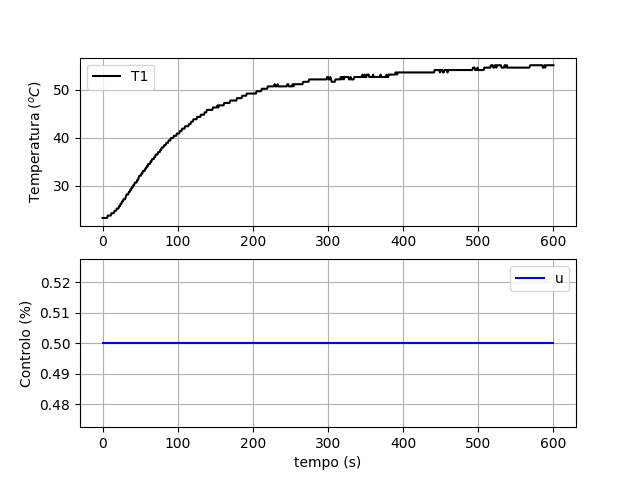

In [183]:
from IPython.display import Image
Image(filename='degrau_S2.png') 

       À semelhança do sistema 1, os valores do sistema 2 são obtidos da mesma forma. Como este sistema apresenta atraso, consegue-se observar no gráfico de temperatura que este sistema, na mesma duração de 10 minutos, demora mais tempo no processo de amostragem e é evidenciado no facto de não atingir uma temperatura tão alta, e de não conseguir atingir o estado de regime permanente.


# Sistema de Primeira Ordem - S1

In [184]:
# Carregar dados
dados = np.loadtxt('dados_S1.txt',delimiter=',')

t_s1 = dados[:,0]  # tempo
u_s1 = dados[:,1]*100  # entrada
y_s1 = dados[:,2]  # saída
#mt = 0
#i = 0

# Dados
# print(t)
# print(u)
# print(y)

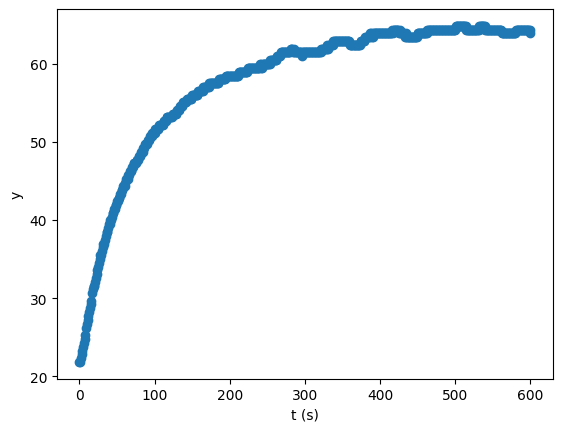

In [185]:
# Gráfico
plt.plot(t_s1,y_s1,'o')
plt.xlabel('t (s)')
plt.ylabel('y')
plt.show()

Método de ajuste dos parâmetros do modelo, $K$ e $\tau$, usando o ponto correspondente a 63.2% da variação final da resposta ao degrau

In [186]:
delta_u_s1 = dados[1,1]*100 #50% pwm

# Ganho
K_s1 = (y_s1[len(y_s1)-1]-y_s1[0])/delta_u_s1

# Constante de tempo
y63_s1 = (y_s1[len(y_s1)-1]-y_s1[0])*0.632+y_s1[0]
f_s1 = interp1d(y_s1,t_s1)
tau_s1 = f_s1(y63_s1)

Resposta do modelo de primeira ordem

$y(t) = y(0)+K\Delta_u(1-e^{\frac{-t}{\tau}})$

In [187]:
# Resposta do modelo
ym_s1 = y_s1[0]+ K_s1*delta_u_s1*(1-np.exp(-t_s1/tau_s1))

# SSE
desvio2_s1 = (y_s1-ym_s1)**2
SSE_s1 = np.sum(desvio2_s1)

# Tss
Tss_s1 = np.mean(y_s1[550:600])

# Delta_T
delta_t_s1=Tss_s1-y_s1[0]

**Alínea c)**

In [188]:
# Parâmetros
print(f'T0: {y_s1[0]} ºC')
print(f'Tss: {Tss_s1} ºC')
print(f'delta_T: {delta_t_s1} ºC')
print('K = '+str(K_s1))
print('tau = '+str(tau_s1))
print('SSE = '+str(SSE_s1))

T0: 21.85 ºC
Tss: 64.179 ºC
delta_T: 42.329 ºC
K = 0.841
tau = 81.3512
SSE = 708.2647052164634


**Alínea d)**

$G(s) = \frac{K}{\tau s +1} = \frac{0.678}{52.002s+1} $ 

METER VALORES

**Alínea e)**

Gráfico com as duas curvas de temperatura: a do modelo e a do sistema térmico

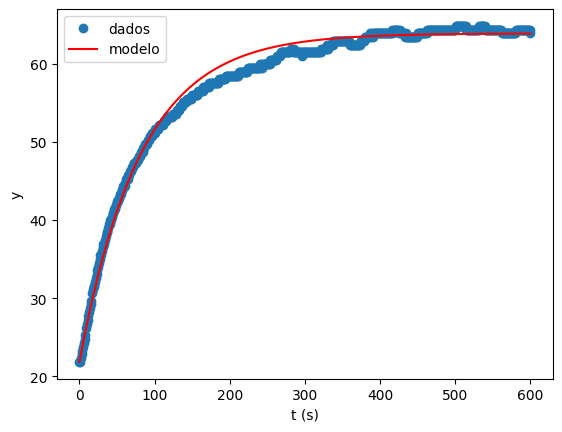

In [189]:
# Gráficos
plt.plot(t_s1,y_s1,'o')
plt.plot(t_s1,ym_s1,'r-')
plt.xlabel('t (s)')
plt.ylabel('y')
plt.legend(['dados','modelo'],loc='best')
plt.savefig('graficoS1.png')
plt.show()


        No gráfico acima, é possível observar que o modelo de primeira ordem se aproxima bastante do sistema térmico. Esta aproximação é feita através dos calculos da constante de tempo e do ganho na fórmula da resposta do modelo de primeira ordem. O SSE é o erro quadrático médio entre o modelo e o sistema térmico. Quanto menor for o SSE, mais próximo o modelo está do sistema térmico. Este apresenta um valor de X e considera-se um valor aceitável para o modelo de primeira ordem.

# Sistema de Primeira Ordem - Otimização (S1) 

In [190]:
# Resposta do modelo
def modelo(x):
    K_s1_rm,tau_s1_rm = x
    ym_s1 = K_s1_rm*delta_u_s1*(1-np.exp(-t_s1/tau_s1_rm))+y_s1[0]
    return ym_s1

In [ ]:
# Função objetivo: SSE
def obj(x):
    return np.sum((y_s1-modelo(x))**2)    
    

SSE inicial:116310.67717840109


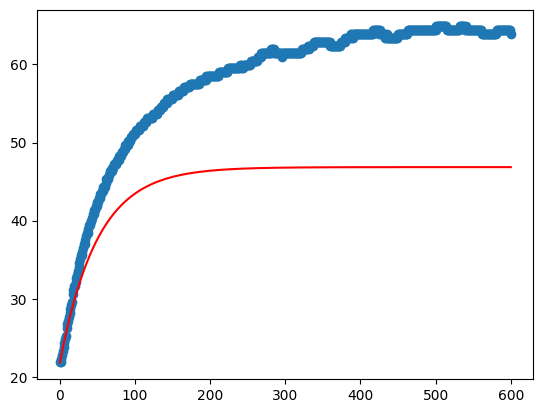

In [ ]:
# Estimativa inicial
x0_s1 = np.array([0.5,50])
# x0 = np.ones(2)*0.4
# print(x0)

# SSE inicial
print('SSE inicial:' + str(obj(x0_s1)))

# Gráfico
plt.plot(t_s1,y_s1,'o')
plt.plot(t_s1,modelo(x0_s1),'r-')
plt.show()

K = 0.8356585247882377
tau = 84.86689408676361
SSE: 554.9317951660083


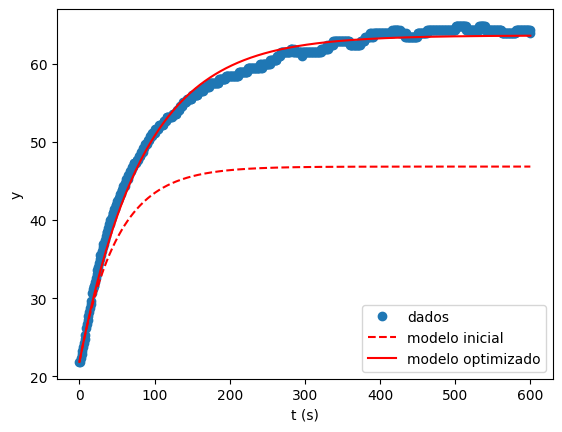

In [ ]:
from scipy.optimize import minimize

# Optimização
sol_s1 = minimize(obj,x0_s1)
xopt_s1 = sol_s1.x
ym_s1 = modelo(xopt_s1)

# Parâmetros optimizados
print('K = ' + str(xopt_s1[0]))
print('tau = ' + str(xopt_s1[1]))
print('SSE: ' + str(obj(xopt_s1)))

# Gráficos
plt.plot(t_s1,y_s1,'o')
plt.plot(t_s1,modelo(x0_s1),'r--')
plt.plot(t_s1,ym_s1,'r-')
plt.xlabel('t (s)')
plt.ylabel('y')
plt.legend(['dados','modelo inicial','modelo optimizado'],loc='best')
plt.savefig('graficoS1_OT.png')

In [ ]:
# Tabela S1 otimizado
print(f'T0: {y_s1[0]} ºC')
print(f'Tss: {Tss_s1} ºC') # media dos ultimos valores
print(f'delta_T: {delta_t_s1} ºC')
print(f'K: {xopt_s1[0]}') #otimizado
print(f'Tau: {xopt_s1[1]} s')
print(f'SSE: {obj(xopt_s1)}')

T0: 21.85 ºC
Tss: 64.179 ºC
delta_T: 42.329 ºC
K: 0.8356585247882377
Tau: 84.86689408676361 s
SSE: 554.9317951660083


        Os valores de K e tau obtidos através do método de ajuste dos parâmetros do modelo, usando o ponto correspondente a 63.2% da variação final da resposta ao degrau, são diferentes dos valores obtidos através do método de otimização. Isto acontece porque o método de ajuste dos parâmetros do modelo é um método de aproximação e não é tão preciso como o método de otimização. 
        
        O método de otimização é mais preciso porque minimiza o erro entre o modelo e o sistema térmico, enquanto que o método de ajuste dos parâmetros do modelo, usando o ponto correspondente a 63.2% da variação final da resposta ao degrau, não minimiza o erro entre o modelo e o sistema térmico. Consequentemente, o SSE do método de otimização é menor do que o SSE do método de ajuste dos parâmetros do modelo.

# Sistema de Primeira Ordem com Atraso - S2

In [ ]:
dados = np.loadtxt('dados_S2.txt',delimiter=',')

t_s2 = dados[:,0]  # tempo
u_s2 = dados[:,1]*100  # entrada
y_s2 = dados[:,2]  # saída
#mt = 0
#i = 0

# Dados
# print(t)
# print(u)
# print(y)

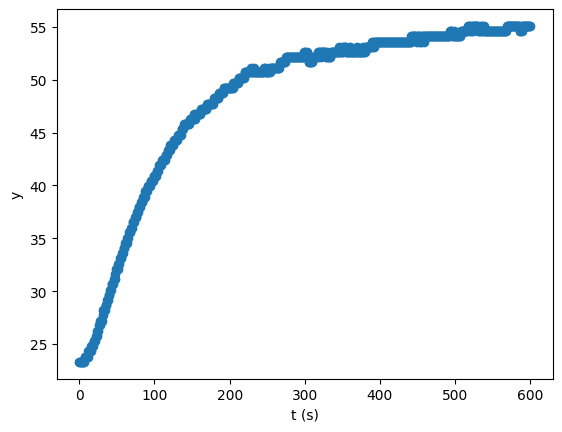

In [ ]:
import matplotlib.pyplot as plt

# Gráfico
plt.plot(t_s2,y_s2,'o')
plt.xlabel('t (s)')
plt.ylabel('y')
plt.show()

Método de ajuste dos parâmetros do modelo, $K$ e $\tau$, usando o ponto correspondente a 63.2% da variação final da resposta ao degrau

In [ ]:
delta_u_s2 = dados[1,1]*100 #50% pwm
# print(delta_u)

yss_medio_s2 = np.mean(y_s2[500:600])
# print(f'yss_medio: {yss_medio}')

# Ganho
K_s2 = (yss_medio_s2-y[0])/delta_u_s2

y63_s2 = (y_s2[len(y_s2)-1]-y_s2[0])*0.632+y_s2[0]
y28_s2 = (y_s2[len(y_s2)-1]-y_s2[0])*0.283+y_s2[0]

f_s2 = interp1d(y_s2,t_s2)
t2_s2= f_s2(y63_s2)
t1_s2 = f_s2(y28_s2)

# Constante de tempo
tau_s2 = 3/2*(t2_s2-t1_s2)

# Constante de tempo de atraso
tauD_s2 = t2_s2 - tau_s2

# Tss
Tss_s2 = np.mean(y_s2[550:600])

# Delta_T
delta_t_s2=Tss_s2-y_s2[0]

Resposta do modelo de primeira ordem com atraso

$y(t)= \overline{y}_{[0,\tau_D]s}+K\Delta_u(1-e^{\frac{-(t-\tau_D)}{\tau}}) $
, $ t > \tau_D $  $ \newline$ $  y(t) = \overline{y}_{[0,\tau_D]s}   $, $ t\leq \tau_D $ 

In [ ]:
# Recolha da media dos dados até tau segundos
#y0_medio = np.mean(y[0:20])
y0_medio_s2 = np.mean(y_s2[0:round(tauD_s2)])

ym_s2 = np.zeros(len(t_s2))

for i in range(len(t_s2)):
    if t_s2[i] >= tauD_s2 :
        ym_s2[i] = K_s2*delta_u_s2*(1-np.exp(-(t_s2[i]-tauD_s2)/tau_s2))+y0_medio_s2
    else:
        ym_s2[i] = y0_medio_s2

# ym = K*delta_u*(1-np.exp(-(t-tauD)/tau))+y0_medio

# SSE
desvio2_s2 = (y_s2-ym_s2)**2
SSE_s2 = np.sum(desvio2_s2)

**Alínea f)**


In [ ]:
# Parametros

print(f'T0: {y_s2[0]} ºC')
print(f'Tss: {Tss_s2} ºC') # media dos ultimos valores
print(f'delta_T: {delta_t_s2} ºC')
print('K = '+str(K_s2))
print('tau = '+str(tau_s2))
print('tauD = '+str(tauD_s2))
print('SSE = '+str(SSE_s2))


T0: 23.3 ºC
Tss: 54.88 ºC
delta_T: 31.580000000000002 ºC
K = 0.6294000000000005
tau = 103.04460000000002
tauD = 17.050599999999974
SSE = 361.21398822807924


**Alínea g)**

$ G(s) = \frac{Ke^{-\tau_D s}}{\tau s+1 } = \frac{0.222e^{-19.69s}}{233.89s+1} $

METER VALORES

**Alínea h)**

Gráfico com as duas curvas de temperatura: a do modelo e a do sistema térmico

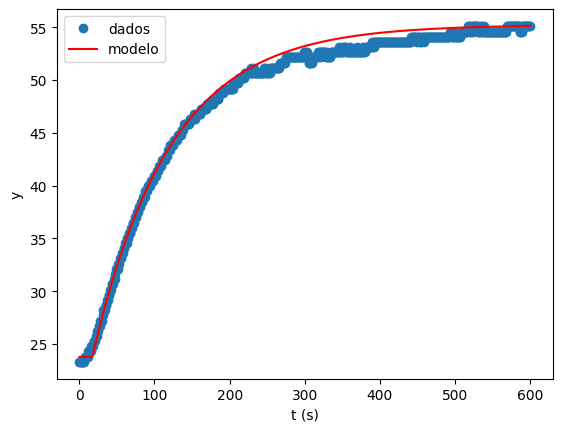

In [ ]:
# gráficos
plt.plot(t_s2,y_s2,'o')
plt.plot(t_s2,ym_s2,'r-')
plt.xlabel('t (s)')
plt.ylabel('y')
plt.legend(['dados','modelo'],loc='best')
plt.savefig('graficoS2.png')
plt.show()

        O sistema 2 apresenta um atraso, o que é evidenciado através da parametrização da constante de tempo com atraso. Este valor é calculado através da diferença entre o tempo que corresponde a 63.2% da variação final da temperatura e a constante de tempo.

        No gráfico acima, é possível observar que o modelo de primeira ordem com atraso se aproxima bastante do sistema térmico, obtendo um SSE relativamente baixo.

# Sistema de Primeira Ordem com Atraso - Otimização (S2) 

In [ ]:
# Resposta do modelo
def modelo(x):
    K_s2_rm,tau_s2_rm = x
    y0_medio_s2_rm = np.mean(y_s2[0:round(tauD_s2)])

    ym_s2_rm = np.zeros(len(t_s2))

    for i in range(len(t_s2)):
        if t_s2[i] > tauD_s2 :
            ym_s2_rm[i] = K_s2_rm*delta_u_s2*(1-np.exp(-(t_s2[i]-tauD_s2)/tau_s2_rm))+y0_medio_s2_rm
        else:
            ym_s2_rm[i] = y0_medio_s2_rm
            
    return ym_s2_rm

In [ ]:
# Função objetivo: SSE
def obj(x):
    return np.sum((y-modelo(x))**2)    
    

SSE inicial:9713.521535172738


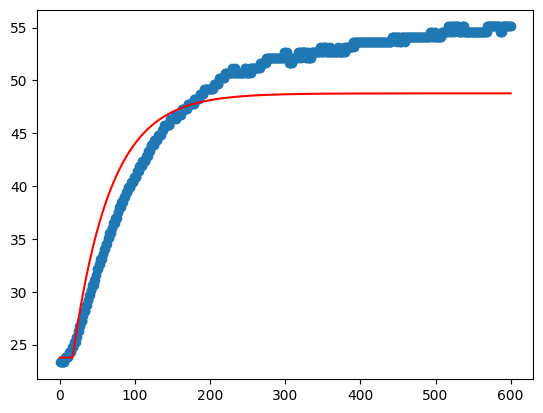

In [ ]:
# Estimativa inicial
x0_s2 = np.array([0.5,50])
# x0 = np.ones(2)*0.4
# print(x0)

# SSE inicial
print('SSE inicial:' + str(obj(x0_s2)))

# Gráfico
plt.plot(t_s2,y_s2,'o')
plt.plot(t_s2,modelo(x0_s2),'r-')
plt.show()

K = 0.6136451849221585
tau = 102.95524215704314
SSE: 97.75495311132016


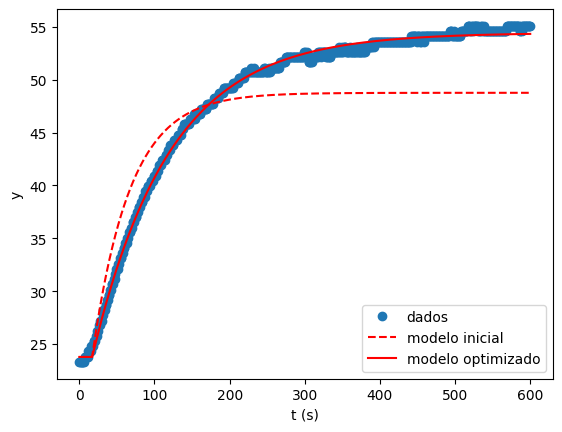

In [ ]:
from scipy.optimize import minimize

# Optimização
sol_s2 = minimize(obj,x0_s2)
xopt_s2 = sol_s2.x
ym_s2 = modelo(xopt_s2)

# Parâmetros optimizados
print('K = ' + str(xopt_s2[0]))
print('tau = ' + str(xopt_s2[1]))
print('SSE: ' + str(obj(xopt_s2)))

# Gráficos
plt.plot(t_s2,y_s2,'o')
plt.plot(t,modelo(x0_s2),'r--')
plt.plot(t_s2,ym_s2,'r-')
plt.xlabel('t (s)')
plt.ylabel('y')
plt.legend(['dados','modelo inicial','modelo optimizado'],loc='best')
plt.savefig('graficoS2_OT.png')

In [ ]:
# Tabela S2 otimizado
print(f'T0: {y_s2[0]} ºC')
print(f'Tss: {Tss_s2} ºC') # media dos ultimos valores
print(f'delta_T: {delta_t_s2} ºC')
print(f'K: {xopt_s2[0]}') 
print(f'Tau: {xopt_s2[1]} s')
print(f'TauD: {xopt_s2[1]} s') # taud ?????????????????
print(f'SSE: {obj(xopt_s2)}')

T0: 23.3 ºC
Tss: 54.88 ºC
delta_T: 31.580000000000002 ºC
K: 0.6136451849221585
Tau: 102.95524215704314 s
TauD: 102.95524215704314 s
SSE: 97.75495311132016


        Consegue-se observar no gráfico do sistema 2 otimizado, que o método de otimização é mais preciso porque minimiza o erro entre o modelo e o sistema térmico. O SSE do método de otimização é menor do que o SSE do método de ajuste dos parâmetros do modelo.